<a href="https://colab.research.google.com/github/RaviSiddu/basics/blob/master/TensorFlow_and_Keras_Build_various_MLP_architectures_for_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow and Keras: Build various MLP architectures for MNIST dataset [M]


### Objective:
#### Model with three dirrent architecture
####  1) 2-Hidden layer architecture (784-472-168-10 architecture)

#### 2) 3-Hidden layer architecture (784-352-164-124-10 architecture)

#### 3) 5-Hidden layer architecture (784-216-170-136-80-38-10 architecture)

#### Train-Test error plot

#### Activation='relu'+ Adam Optimizer+Batch_Normalization +Drop_out

In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [2]:
%matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x,vy,ty,ax,colors=['b']):
  ax.plot(x,vy,'b',label='Validation Loss')
  ax.plot(x,ty,'r',label='Train Loss')
  plt.legend()
  plt.grid()
  fig.canvas.draw()
  

Using matplotlib backend: agg


In [3]:
#the data
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [4]:
print("Number of training examples:",x_train.shape[0],"and each image is of shape(%d,%d)"%(x_train.shape[1],x_train.shape[2]))
print("Number of training examples :", x_test.shape[0], "and each image is of shape (%d, %d)"%(x_test.shape[1], x_test.shape[2]))

Number of training examples: 60000 and each image is of shape(28,28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]) 
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", x_train.shape[0], "and each image is of shape (%d)"%(x_train.shape[1]))
print("Number of training examples :", x_test.shape[0], "and each image is of shape (%d)"%(x_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
#Example data point
print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

x_train = x_train/255
x_test = x_test/255

In [9]:
# example data point after normlizing
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

print("After converting the output into a vector : ",y_train[0])



Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Softax Classifier


In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.initializers import he_normal


In [0]:
# some model parameters

output_dim=10
input_dim=x_train.shape[1]

batch_size=128
nb_epoch=20

# 1) 2-Hidden layer architecture (784-472-168-10 architecture)




## 1.1 MLP + ReLU + ADAM

In [13]:
import warnings
warnings.filterwarnings("ignore")

model_relu=Sequential()
model_relu.add(Dense(472,activation='relu',input_shape=(input_dim,),kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(168,activation='relu',kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(output_dim,activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history1=model_relu.fit(x_train,y_train,batch_size=batch_size,epochs=20,verbose=1,validation_data=(x_test,y_test))






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 472)               370520    
_________________________________________________________________
dense_2 (Dense)              (None, 168)               79464     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1690      
Total params: 451,674
Trainable params: 451,674
Non-trainable params: 0
_________________________________________________________________
None


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 8s 125us/step - loss: 0.2308 - acc: 0.9319 - val_loss: 0.1191 - val_acc: 0.9625
Epoch 2/20
60000/60000 [==============================] - 3s 51us/step - loss

In [0]:
%matplotlib inline

Test score:0.114
Test accuracy 0.9792


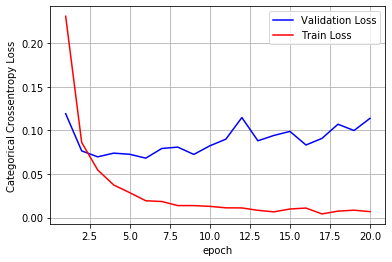

In [15]:
score=model_relu.evaluate(x_test,y_test,verbose=0)
score1=score[0]
score2=score[1]
train_acc1=history1.history['acc']
print("Test score:%.3f"%score[0])
print("Test accuracy",score[1])

fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch');ax.set_ylabel('Categorical Crossentropy Loss')

x=list(range(1,nb_epoch+1))

vy1=history1.history['val_loss']
ty1=history1.history['loss']

plt_dynamic(x,vy1,ty1,ax)

## 1.2MLP + Sigmoid activation + SGDOptimizer

In [16]:

# Multilayer perceptron

model_sigmoid=Sequential()
model_sigmoid.add(Dense(472,activation='sigmoid',input_shape=(input_dim,),kernel_initializer=he_normal(seed=None)))
model_sigmoid.add(Dense(168,activation='sigmoid',kernel_initializer=he_normal(seed=None)))
model_sigmoid.add(Dense(output_dim,activation='softmax'))

print(model_relu.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 472)               370520    
_________________________________________________________________
dense_2 (Dense)              (None, 168)               79464     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1690      
Total params: 451,674
Trainable params: 451,674
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
model_sigmoid.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

history12=model_sigmoid.fit(x_train,y_train,batch_size=batch_size,epochs=20,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 46us/step - loss: 2.2568 - acc: 0.2573 - val_loss: 2.1935 - val_acc: 0.5355
Epoch 2/20
60000/60000 [==============================] - 3s 43us/step - loss: 2.1344 - acc: 0.4961 - val_loss: 2.0595 - val_acc: 0.6280
Epoch 3/20
60000/60000 [==============================] - 3s 42us/step - loss: 1.9780 - acc: 0.6092 - val_loss: 1.8710 - val_acc: 0.6719
Epoch 4/20
60000/60000 [==============================] - 2s 42us/step - loss: 1.7660 - acc: 0.6705 - val_loss: 1.6311 - val_acc: 0.7284
Epoch 5/20
60000/60000 [==============================] - 3s 42us/step - loss: 1.5202 - acc: 0.7175 - val_loss: 1.3811 - val_acc: 0.7495
Epoch 6/20
60000/60000 [==============================] - 3s 42us/step - loss: 1.2873 - acc: 0.7546 - val_loss: 1.1643 - val_acc: 0.7742
Epoch 7/20
60000/60000 [==============================] - 2s 41us/step - loss: 1.0964 - acc: 0.7811 - val_loss: 0.9974 - val_acc

Test score:0.431
Test accuracy 0.8853


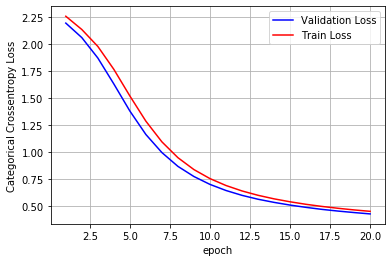

In [18]:
score=model_sigmoid.evaluate(x_test,y_test,verbose=0)
score1=score[0]
score2=score[1]
train_acc1=history12.history['acc']
print("Test score:%.3f"%score[0])
print("Test accuracy",score[1])

fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch');ax.set_ylabel('Categorical Crossentropy Loss')

x=list(range(1,nb_epoch+1))

vy1=history12.history['val_loss']
ty1=history12.history['loss']

plt_dynamic(x,vy1,ty1,ax)

## 1.3 MLP + Batch-Norm on hidden Layers + AdamOptimizer

In [19]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(472, activation='relu', 
                      input_shape=(input_dim,),
                      kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(168, activation='relu', 
                      kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 472)               370520    
_________________________________________________________________
batch_normalization_1 (Batch (None, 472)               1888      
_________________________________________________________________
dense_8 (Dense)              (None, 168)               79464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 168)               672       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1690      
Total params: 454,234
Trainable params: 452,954
Non-trainable params: 1,280
_________________________________________________________________


In [20]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', 
                    metrics=['accuracy'])

history13 = model_batch.fit(x_train, y_train, 
                           batch_size=batch_size,
                           epochs=nb_epoch, verbose=1, 
                           validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.1838 - acc: 0.9453 - val_loss: 0.0999 - val_acc: 0.9682
Epoch 2/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0701 - acc: 0.9784 - val_loss: 0.0856 - val_acc: 0.9739
Epoch 3/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0438 - acc: 0.9864 - val_loss: 0.0674 - val_acc: 0.9782
Epoch 4/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0304 - acc: 0.9904 - val_loss: 0.0734 - val_acc: 0.9770
Epoch 5/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0226 - acc: 0.9931 - val_loss: 0.0759 - val_acc: 0.9752
Epoch 6/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0212 - acc: 0.9934 - val_loss: 0.0703 - val_acc: 0.9794
Epoch 7/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0214 - acc: 0.9927 - val_loss: 0.0707 - val_acc

Test score:0.078
Test accuracy: 0.9814


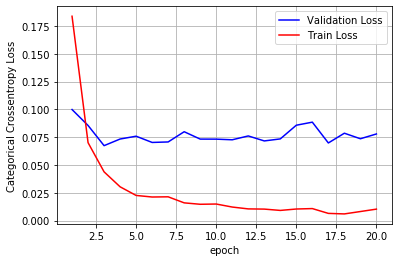

In [26]:

score = model_batch.evaluate(x_test, y_test, verbose=0) 
print('Test score:%.3f'%score[0]) 
print('Test accuracy:', score[1])
score3=score[0]
score4=score[1]
train_acc2=history13.history['acc']

fig,ax12 = plt.subplots(1,1)
ax12.set_xlabel('epoch') ; ax12.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy12 = history13.history['val_loss']
ty12 = history13.history['loss']
plt_dynamic(x, vy12, ty12, ax12)

## 1.4 MLP + Dropout + AdamOptimizer

In [22]:

# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(472, activation='relu',
                     input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(168, activation='relu',
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 472)               370520    
_________________________________________________________________
batch_normalization_3 (Batch (None, 472)               1888      
_________________________________________________________________
dropout_1 (Dropout)          (None, 472)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 168)               79464     
_________________________________________________________________
batch_normalization_4 (Batch (None, 168)               672       
_________________________________________________________________
dropout_2 (Dropout)          (None, 168)               0         
_____

In [24]:

model_drop.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history14 = model_drop.fit(x_train, y_train,
                         batch_size=batch_size,
                         
                         epochs=nb_epoch, verbose=1,
                         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.1232 - acc: 0.9631 - val_loss: 0.0739 - val_acc: 0.9769
Epoch 2/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.1129 - acc: 0.9657 - val_loss: 0.0709 - val_acc: 0.9781
Epoch 3/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0979 - acc: 0.9694 - val_loss: 0.0635 - val_acc: 0.9796
Epoch 4/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0916 - acc: 0.9717 - val_loss: 0.0592 - val_acc: 0.9814
Epoch 5/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0826 - acc: 0.9743 - val_loss: 0.0697 - val_acc: 0.9795
Epoch 6/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0801 - acc: 0.9749 - val_loss: 0.0642 - val_acc: 0.9807
Epoch 7/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0720 - acc: 0.9777 - val_loss: 0.0580 - val_ac

Test score:0.054
Test accuracy: 0.985


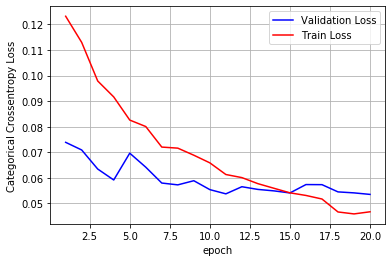

In [25]:

score = model_drop.evaluate(x_test, y_test, verbose=0) 
score5=score[0]
score6=score[1]
train_acc3=history14.history['acc']
print('Test score:%.3f'% score[0]) 
print('Test accuracy:', score[1])

fig,ax13 = plt.subplots(1,1)
ax13.set_xlabel('epoch') ; ax13.set_ylabel('Categorical Crossentropy Loss')

vy13 = history14.history['val_loss']
ty13 = history14.history['loss']
plt_dynamic(x, vy13, ty13, ax13)

## 1.5 MLP + Dropout + AdamOptimizer


In [27]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(472, activation='sigmoid',
                     input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.2))

model_drop.add(Dense(168, activation='sigmoid',
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.2))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 472)               370520    
_________________________________________________________________
batch_normalization_5 (Batch (None, 472)               1888      
_________________________________________________________________
dropout_3 (Dropout)          (None, 472)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 168)               79464     
_________________________________________________________________
batch_normalization_6 (Batch (None, 168)               672       
_________________________________________________________________
dropout_4 (Dropout)          (None, 168)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [28]:
model_drop.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history15 = model_drop.fit(x_train, y_train,
                         batch_size=batch_size,
                         
                         epochs=nb_epoch, verbose=1,
                         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.3344 - acc: 0.9001 - val_loss: 0.1856 - val_acc: 0.9452
Epoch 2/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.1962 - acc: 0.9412 - val_loss: 0.1385 - val_acc: 0.9588
Epoch 3/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.1542 - acc: 0.9534 - val_loss: 0.1243 - val_acc: 0.9608
Epoch 4/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.1288 - acc: 0.9612 - val_loss: 0.1008 - val_acc: 0.9680
Epoch 5/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.1076 - acc: 0.9669 - val_loss: 0.0913 - val_acc: 0.9704
Epoch 6/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0937 - acc: 0.9699 - val_loss: 0.0784 - val_acc: 0.9742
Epoch 7/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0811 - acc: 0.9742 - val_loss: 0.0758 - val_ac

Test score:0.069
Test accuracy: 0.9811


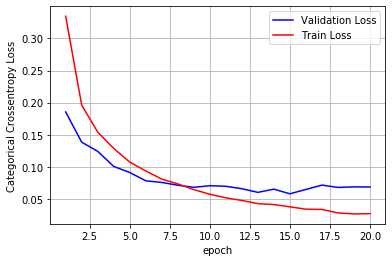

In [29]:
score = model_drop.evaluate(x_test, y_test, verbose=0) 
score5=score[0]
score6=score[1]
train_acc3=history15.history['acc']
print('Test score:%.3f'% score[0]) 
print('Test accuracy:', score[1])

fig,ax13 = plt.subplots(1,1)
ax13.set_xlabel('epoch') ; ax13.set_ylabel('Categorical Crossentropy Loss')

vy13 = history15.history['val_loss']
ty13 = history15.history['loss']
plt_dynamic(x, vy13, ty13, ax13)

# 2) 3-Hidden layer architecture (784-352-164-124 architecture)


## 2.1 MLP + ReLU + ADAM

In [33]:
model_relu = Sequential()
model_relu.add(Dense(352, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(164, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
                                                    
model_relu.add(Dense(124, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history21 = model_relu.fit(x_train, y_train, 
                         batch_size=batch_size, 
                         epochs=nb_epoch, verbose=1, 
                         validation_data=(x_test, y_test))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 352)               276320    
_________________________________________________________________
dense_25 (Dense)             (None, 164)               57892     
_________________________________________________________________
dense_26 (Dense)             (None, 124)               20460     
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1250      
Total params: 355,922
Trainable params: 355,922
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.2402 - acc: 0.9288 - val_loss: 0.1309 - val_acc: 0.9580
Epoch 2/20
60000/60000 [==============================

Test score:0.095
Test accuracy: 0.9822


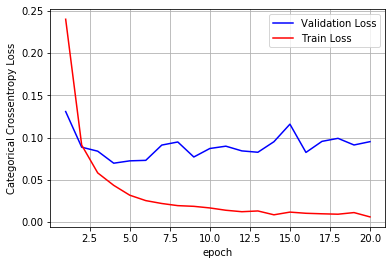

In [35]:

score = model_relu.evaluate(x_test, y_test, verbose=0) 
score7=score[0]
score8=score[1]
train_acc4=history21.history['acc']
print('Test score:%.3f'%score[0]) 
print('Test accuracy:', score[1])

fig,ax21 = plt.subplots(1,1)
ax21.set_xlabel('epoch') ; ax21.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy21 = history21.history['val_loss']
ty21 = history21.history['loss']
plt_dynamic(x, vy21, ty21, ax21)

## 2.2 MLP + Batch-Norm on hidden Layers + AdamOptimizer

In [0]:

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(352, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())
model_batch.add(Dense(164, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
                                                    
model_batch.add(Dense(124, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))

In [37]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', 
                    metrics=['accuracy'])

history22 = model_batch.fit(x_train, y_train, 
                           batch_size=batch_size,
                           epochs=nb_epoch, verbose=1, 
                           validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.2032 - acc: 0.9386 - val_loss: 0.1095 - val_acc: 0.9653
Epoch 2/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0768 - acc: 0.9765 - val_loss: 0.0857 - val_acc: 0.9725
Epoch 3/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0511 - acc: 0.9840 - val_loss: 0.0805 - val_acc: 0.9729
Epoch 4/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0393 - acc: 0.9870 - val_loss: 0.0764 - val_acc: 0.9765
Epoch 5/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0329 - acc: 0.9893 - val_loss: 0.0807 - val_acc: 0.9738
Epoch 6/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0255 - acc: 0.9918 - val_loss: 0.0836 - val_acc: 0.9751
Epoch 7/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0232 - acc: 0.9919 - val_loss: 0.0827 - val_a

Test score:0.070
Test accuracy: 0.9828


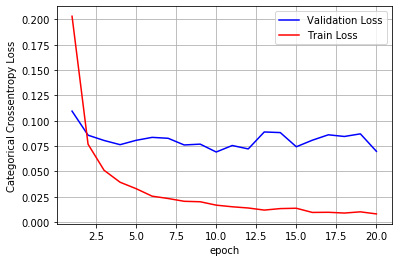

In [38]:
score = model_batch.evaluate(x_test, y_test, verbose=0) 
score9=score[0]
score10=score[1]
train_acc5=history22.history['acc']
print('Test score:%.3f'%score[0]) 
print('Test accuracy:', score[1])

fig,ax22 = plt.subplots(1,1)
ax22.set_xlabel('epoch') ; ax22.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy22 = history22.history['val_loss']
ty22 = history22.history['loss']
plt_dynamic(x, vy22, ty22, ax22)

## 2.3 MLP + Dropout + AdamOptimizer

In [0]:
from keras.layers import Dropout

model_drop = Sequential()
model_drop.add(Dense(352, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))

model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(164, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

                                                    
model_drop.add(Dense(124, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

In [40]:
model_drop.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history23 = model_drop.fit(x_train, y_train,
                         batch_size=batch_size,
                         
                         epochs=nb_epoch, verbose=1,
                         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.6761 - acc: 0.7909 - val_loss: 0.1836 - val_acc: 0.9448
Epoch 2/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.2960 - acc: 0.9121 - val_loss: 0.1352 - val_acc: 0.9582
Epoch 3/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.2275 - acc: 0.9340 - val_loss: 0.1139 - val_acc: 0.9668
Epoch 4/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.1890 - acc: 0.9446 - val_loss: 0.0975 - val_acc: 0.9705
Epoch 5/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.1707 - acc: 0.9506 - val_loss: 0.0945 - val_acc: 0.9715
Epoch 6/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.1545 - acc: 0.9552 - val_loss: 0.0931 - val_acc: 0.9721
Epoch 7/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.1404 - acc: 0.9583 - val_loss: 0.0868 - 

Test score:0.064
Test accuracy: 0.9812


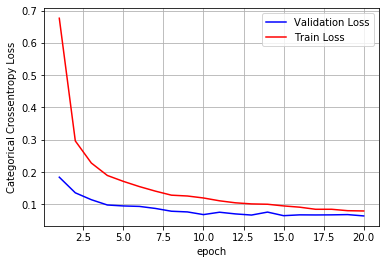

In [41]:
score = model_drop.evaluate(x_test, y_test, verbose=0)
score11=score[0]
score12=score[1]
train_acc6=history23.history['acc']
print('Test score:%.3f'%score[0]) 
print('Test accuracy:', score[1])

fig,ax23 = plt.subplots(1,1)
ax23.set_xlabel('epoch') ; ax23.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy23 = history23.history['val_loss']
ty23 = history23.history['loss']
plt_dynamic(x, vy23, ty23, ax23)

## 2.4 MLP + Sigmoid activation + SGDOptimizer

In [42]:
# Multilayer perceptron

model_sigmoid=Sequential()
model_sigmoid.add(Dense(352,activation='sigmoid',input_shape=(input_dim,),kernel_initializer=he_normal(seed=None)))
model_sigmoid.add(Dense(164,activation='sigmoid',kernel_initializer=he_normal(seed=None)))
model_sigmoid.add(Dense(128,activation='sigmoid',kernel_initializer=he_normal(seed=None)))
model_sigmoid.add(Dense(output_dim,activation='softmax'))

print(model_relu.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 352)               276320    
_________________________________________________________________
dense_25 (Dense)             (None, 164)               57892     
_________________________________________________________________
dense_26 (Dense)             (None, 124)               20460     
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1250      
Total params: 355,922
Trainable params: 355,922
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
model_sigmoid.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

history24=model_sigmoid.fit(x_train,y_train,batch_size=batch_size,epochs=20,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 68us/step - loss: 2.2983 - acc: 0.1223 - val_loss: 2.2880 - val_acc: 0.1931
Epoch 2/20
60000/60000 [==============================] - 3s 46us/step - loss: 2.2820 - acc: 0.1428 - val_loss: 2.2748 - val_acc: 0.1171
Epoch 3/20
60000/60000 [==============================] - 3s 45us/step - loss: 2.2679 - acc: 0.1947 - val_loss: 2.2598 - val_acc: 0.2909
Epoch 4/20
60000/60000 [==============================] - 3s 45us/step - loss: 2.2509 - acc: 0.2538 - val_loss: 2.2394 - val_acc: 0.4310
Epoch 5/20
60000/60000 [==============================] - 3s 45us/step - loss: 2.2282 - acc: 0.3320 - val_loss: 2.2122 - val_acc: 0.3502
Epoch 6/20
60000/60000 [==============================] - 3s 45us/step - loss: 2.1968 - acc: 0.4053 - val_loss: 2.1755 - val_acc: 0.4377
Epoch 7/20
60000/60000 [==============================] - 3s 46us/step - loss: 2.1509 - acc: 0.4683 - val_loss: 2.1176 - val_acc

Test score:0.064
Test accuracy: 0.9812


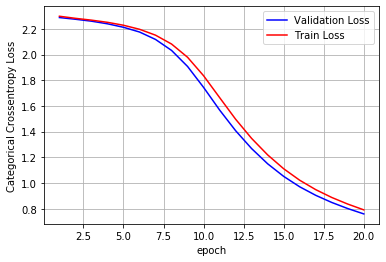

In [44]:
score = model_drop.evaluate(x_test, y_test, verbose=0)
score11=score[0]
score12=score[1]
train_acc6=history24.history['acc']
print('Test score:%.3f'%score[0]) 
print('Test accuracy:', score[1])

fig,ax23 = plt.subplots(1,1)
ax23.set_xlabel('epoch') ; ax23.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy23 = history24.history['val_loss']
ty23 = history24.history['loss']
plt_dynamic(x, vy23, ty23, ax23)

## 2.5 MLP + Dropout + AdamOptimizer

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()
model_drop.add(Dense(352, activation='sigmoid', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))

model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.2))
model_drop.add(Dense(164, activation='sigmoid', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.2))

                                                    
model_drop.add(Dense(124, activation='sigmoid', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.2))

model_drop.add(Dense(output_dim, activation='softmax'))

In [46]:
model_drop.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history25 = model_drop.fit(x_train, y_train,
                         batch_size=batch_size,
                         
                         epochs=nb_epoch, verbose=1,
                         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.3702 - acc: 0.8884 - val_loss: 0.1879 - val_acc: 0.9453
Epoch 2/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.2242 - acc: 0.9324 - val_loss: 0.1597 - val_acc: 0.9510
Epoch 3/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.1759 - acc: 0.9468 - val_loss: 0.1276 - val_acc: 0.9616
Epoch 4/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.1493 - acc: 0.9546 - val_loss: 0.1028 - val_acc: 0.9675
Epoch 5/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.1277 - acc: 0.9609 - val_loss: 0.0903 - val_acc: 0.9722
Epoch 6/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.1111 - acc: 0.9655 - val_loss: 0.0761 - val_acc: 0.9771
Epoch 7/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0952 - acc: 0.9699 - val_loss: 0.0790 - 

Test score:0.059
Test accuracy: 0.9836


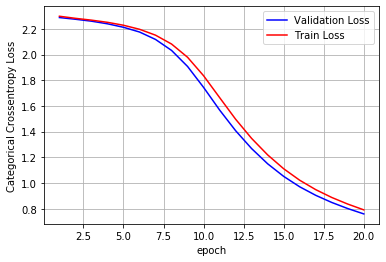

In [47]:
score = model_drop.evaluate(x_test, y_test, verbose=0)
score11=score[0]
score12=score[1]
train_acc6=history24.history['acc']
print('Test score:%.3f'%score[0]) 
print('Test accuracy:', score[1])

fig,ax23 = plt.subplots(1,1)
ax23.set_xlabel('epoch') ; ax23.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy23 = history24.history['val_loss']
ty23 = history24.history['loss']
plt_dynamic(x, vy23, ty23, ax23)

# 3) 5-Hidden layer architecture (784-216-170-136-80-38-10 architecture)


## 3.1 MLP + ReLU + ADAM

In [48]:

model_relu = Sequential()
model_relu.add(Dense(216, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(170, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
                                                    
model_relu.add(Dense(136, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(80, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
                                                    
model_relu.add(Dense(38, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history31 = model_relu.fit(x_train, y_train, 
                         batch_size=batch_size, 
                         epochs=nb_epoch, verbose=1, 
                         validation_data=(x_test, y_test))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 216)               169560    
_________________________________________________________________
dense_45 (Dense)             (None, 170)               36890     
_________________________________________________________________
dense_46 (Dense)             (None, 136)               23256     
_________________________________________________________________
dense_47 (Dense)             (None, 80)                10960     
_________________________________________________________________
dense_48 (Dense)             (None, 38)                3078      
_________________________________________________________________
dense_49 (Dense)             (None, 10)                390       
Total params: 244,134
Trainable params: 244,134
Non-trainable params: 0
_______________________________________________

Test score:0.092
Test accuracy: 0.9795


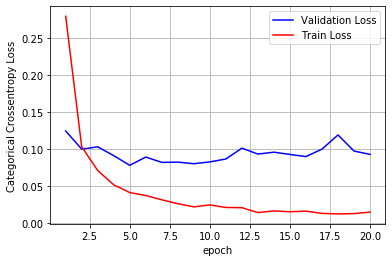

In [50]:
score = model_relu.evaluate(x_test, y_test, verbose=0) 
score13=score[0]
score14=score[1]
train_acc7=history31.history['acc']
print('Test score:%.3f'% score[0]) 
print('Test accuracy:', score[1])

fig,ax31 = plt.subplots(1,1)
ax31.set_xlabel('epoch') ; ax31.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy31 = history31.history['val_loss']
ty31 = history31.history['loss']
plt_dynamic(x, vy31, ty31, ax31)


## 3.2 MLP + Batch-Norm on hidden Layers + AdamOptimizer

In [0]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(216, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())
model_batch.add(Dense(170, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
                                                    
model_batch.add(Dense(136, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(80, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
                                                    
model_batch.add(Dense(38, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))

In [52]:

model_batch.compile(optimizer='adam', loss='categorical_crossentropy', 
                    metrics=['accuracy'])

history32 = model_batch.fit(x_train, y_train, 
                           batch_size=batch_size,
                           epochs=nb_epoch, verbose=1, 
                           validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.2937 - acc: 0.9144 - val_loss: 0.1178 - val_acc: 0.9652
Epoch 2/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.1025 - acc: 0.9685 - val_loss: 0.1001 - val_acc: 0.9690
Epoch 3/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0707 - acc: 0.9777 - val_loss: 0.0920 - val_acc: 0.9715
Epoch 4/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.0532 - acc: 0.9835 - val_loss: 0.0835 - val_acc: 0.9751
Epoch 5/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.0425 - acc: 0.9866 - val_loss: 0.0827 - val_acc: 0.9747
Epoch 6/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.0367 - acc: 0.9879 - val_loss: 0.0917 - val_acc: 0.9737
Epoch 7/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.0328 - acc: 0.9898 - val_loss: 0.0923 -

Test score:0.069
Test accuracy: 0.9823


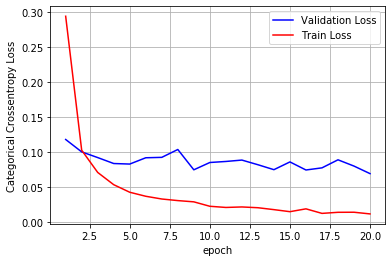

In [53]:
score = model_batch.evaluate(x_test, y_test, verbose=0) 
score15=score[0]
score16=score[1]
train_acc8=history32.history['acc']
print('Test score:%.3f'% score[0]) 
print('Test accuracy:', score[1])

fig,ax32 = plt.subplots(1,1)
ax32.set_xlabel('epoch') ; ax32.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy32 = history32.history['val_loss']
ty32 = history32.history['loss']
plt_dynamic(x, vy32, ty32, ax32)

## 3.3 MLP + Dropout + AdamOptimizer

In [0]:

# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()
model_relu.add(Dense(216, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_relu.add(Dense(170, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
                                                    
model_relu.add(Dense(136, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_relu.add(Dense(80, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
                                                    
model_relu.add(Dense(38, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

In [55]:
model_drop.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history33 = model_drop.fit(x_train, y_train,
                         batch_size=batch_size,
                         
                         epochs=nb_epoch, verbose=1,
                         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 167us/step - loss: 2.1477 - acc: 0.3122 - val_loss: 1.0585 - val_acc: 0.8262
Epoch 2/20
60000/60000 [==============================] - 7s 117us/step - loss: 1.6022 - acc: 0.4443 - val_loss: 0.9708 - val_acc: 0.8431
Epoch 3/20
60000/60000 [==============================] - 7s 114us/step - loss: 1.5939 - acc: 0.4488 - val_loss: 0.9560 - val_acc: 0.8457
Epoch 4/20
60000/60000 [==============================] - 7s 114us/step - loss: 1.5868 - acc: 0.4490 - val_loss: 0.9482 - val_acc: 0.8495
Epoch 5/20
60000/60000 [==============================] - 7s 116us/step - loss: 1.5843 - acc: 0.4507 - val_loss: 0.9432 - val_acc: 0.8479
Epoch 6/20
60000/60000 [==============================] - 7s 115us/step - loss: 1.5838 - acc: 0.4498 - val_loss: 0.9405 - val_acc: 0.8433
Epoch 7/20
60000/60000 [==============================] - 7s 115us/step - loss: 1.5845 - acc: 0.4541 - val_loss: 0.9489 -

Test score:0.932
Test accuracy: 0.85


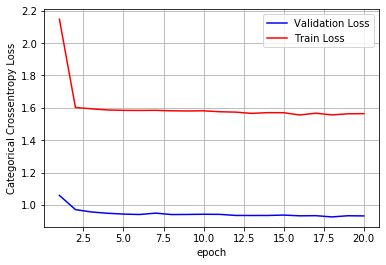

In [56]:
score = model_drop.evaluate(x_test, y_test, verbose=0) 
score17=score[0]
score18=score[1]
train_acc9=history33.history['acc']
print('Test score:%.3f'%score[0]) 
print('Test accuracy:', score[1])

fig,ax33 = plt.subplots(1,1)
ax33.set_xlabel('epoch') ; ax33.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy33 = history33.history['val_loss']
ty33 = history33.history['loss']
plt_dynamic(x, vy33, ty33, ax33)

## 3.4 MLP + Sigmoid activation + SGDOptimizer

In [59]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(216, activation='sigmoid', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_sigmoid.add(Dense(170, activation='sigmoid', 
                     kernel_initializer=he_normal(seed=None)) )
                                                    
model_sigmoid.add(Dense(136, activation='sigmoid', 
                     kernel_initializer=he_normal(seed=None)) )
model_sigmoid.add(Dense(80, activation='sigmoid', 
                     kernel_initializer=he_normal(seed=None)) )
                                                    
model_sigmoid.add(Dense(38, activation='sigmoid', 
                     kernel_initializer=he_normal(seed=None)) )
model_sigmoid.add(Dense(output_dim, activation='softmax'))

print(model_sigmoid.summary())

model_sigmoid.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history34 = model_sigmoid.fit(x_train, y_train, 
                         batch_size=batch_size, 
                         epochs=nb_epoch, verbose=1, 
                         validation_data=(x_test, y_test))

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 216)               169560    
_________________________________________________________________
dense_69 (Dense)             (None, 170)               36890     
_________________________________________________________________
dense_70 (Dense)             (None, 136)               23256     
_________________________________________________________________
dense_71 (Dense)             (None, 80)                10960     
_________________________________________________________________
dense_72 (Dense)             (None, 38)                3078      
_________________________________________________________________
dense_73 (Dense)             (None, 10)                390       
Total params: 244,134
Trainable params: 244,134
Non-trainable params: 0
_______________________________________________

Test score:0.932
Test accuracy: 0.85


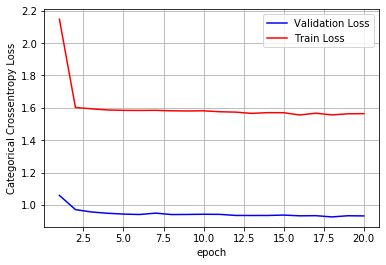

In [60]:
score = model_drop.evaluate(x_test, y_test, verbose=0) 
score17=score[0]
score18=score[1]
train_acc9=history34.history['acc']
print('Test score:%.3f'%score[0]) 
print('Test accuracy:', score[1])

fig,ax33 = plt.subplots(1,1)
ax33.set_xlabel('epoch') ; ax33.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy33 = history33.history['val_loss']
ty33 = history33.history['loss']
plt_dynamic(x, vy33, ty33, ax33)

## MLP + Dropout + AdamOptimizer

In [0]:
from keras.layers import Dropout

model_drop = Sequential()
model_relu.add(Dense(216, activation='sigmoid', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.2))
model_relu.add(Dense(170, activation='sigmoid', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.2))
                                                    
model_relu.add(Dense(136, activation='sigmoid', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.2))
model_relu.add(Dense(80, activation='sigmoid', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.2))
                                                    
model_relu.add(Dense(38, activation='sigmoid', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.2))

model_drop.add(Dense(output_dim, activation='softmax'))

In [63]:
model_drop.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history35 = model_drop.fit(x_train, y_train,
                         batch_size=batch_size,
                         
                         epochs=nb_epoch, verbose=1,
                         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.4877 - acc: 0.8504 - val_loss: 0.3222 - val_acc: 0.9134
Epoch 2/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.4771 - acc: 0.8541 - val_loss: 0.3186 - val_acc: 0.9139
Epoch 3/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.4790 - acc: 0.8530 - val_loss: 0.3201 - val_acc: 0.9136
Epoch 4/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.4822 - acc: 0.8521 - val_loss: 0.3137 - val_acc: 0.9135
Epoch 5/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.4832 - acc: 0.8538 - val_loss: 0.3139 - val_acc: 0.9153
Epoch 6/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.4808 - acc: 0.8515 - val_loss: 0.3157 - val_acc: 0.9157
Epoch 7/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.4795 - acc: 0.8535 - val_loss: 0.3169 -

Test score:0.308
Test accuracy: 0.9142


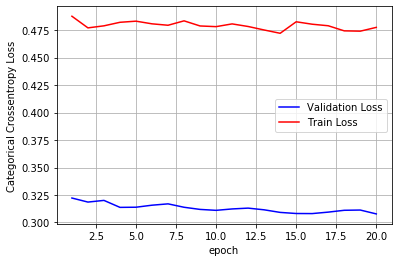

In [64]:
score = model_drop.evaluate(x_test, y_test, verbose=0) 
score17=score[0]
score18=score[1]
train_acc9=history35.history['acc']
print('Test score:%.3f'%score[0]) 
print('Test accuracy:', score[1])

fig,ax33 = plt.subplots(1,1)
ax33.set_xlabel('epoch') ; ax33.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy33 = history35.history['val_loss']
ty33 = history35.history['loss']
plt_dynamic(x, vy33, ty33, ax33)

# Final observation:

In [0]:
from prettytable import PrettyTable

In [0]:

models=['2_hidden_layer MLP+ReLu+Adam',
        '2_hidden_layer MLP+Relu+adam+BN',
        '2_hidden_layer MLP+reLu+Adam+BN+Drop-out',
       '3_hidden_layer MLP+ReLu+Adam',
        '3_hidden_layer MLP+Relu+adam+BN',
        '3_hidden_layer MLP+reLu+Adam+BN+Drop-out',
       '5_hidden_layer MLP+ReLu+Adam',
        '5_hidden_layer MLP+Relu+adam+BN',
        '5_hidden_layer MLP+reLu+Adam+BN+Drop-out']

In [0]:
training_accuracy=[train_acc1,train_acc2,train_acc3,train_acc4,
                   train_acc5,train_acc6,train_acc7,train_acc8,
                   train_acc9
                   
                  ]

In [0]:
test_accuracy=[score2,score4,score6,score8,score10,score12,score14,
              score16,
              score18]
INDEX = [1,2,3,4,5,6,7,8,9]

In [69]:
# Initializing prettytable
Model_Performance = PrettyTable()
# Adding columns
Model_Performance.add_column("INDEX.",INDEX)
Model_Performance.add_column("MODEL_NAME",models)
Model_Performance.add_column("TRAINING ACCURACY",training_accuracy)
Model_Performance.add_column("TESTING ACCURACY",test_accuracy)

print(Model_Performance)

+--------+------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------+
| INDEX. |                MODEL_NAME                |                                                                                                                                                                                          TRAINING ACCURACY                                                                                                                                                                                           | TESTING ACCURACY |
+--------+------------------------------------------+-------------------